In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = pd.read_csv('Task2_Data.csv')
file.head()

,CustomerID,Name,Gender,Age,Annual Income (k$),Spending Score (1-100),Address,Occupation,City
0,1,Luis Jackson,Male,19,15,39,"7294 Scott Harbor Apt. 602\nNorth Tammytown, W...","Teacher, music",Brandonshire
1,2,Nicole Cruz,Male,21,15,81,"67557 Moody Roads\nLake Johnshire, PW 59047",Product manager,Ariasstad
2,3,Linda Brooks,Female,20,16,6,"090 Hancock Highway\nSouth Patriciaview, DC 65170",Sub,North Shaneville
3,4,Steven Morgan,Female,23,16,77,"6532 Amanda Mission Apt. 406\nHollyburgh, RI 9...",Administrator,Lake Rebecca
4,5,Kelly Evans,Female,31,17,40,"27141 Lawrence Plains\nGaryfurt, WV 94124",Occupational therapist,Adamsborough


# Data Preprocessing

In [4]:
file.dropna(inplace=True)
file.drop_duplicates(inplace=True)
file.drop(['Name'], axis=1, inplace=True)

# convert 'Gender' column to int64 and assign 1 to male and 0 to female
file['Gender'] = file['Gender'].apply(lambda x: 1 if x=='Male' else 0).astype('int64')

# check the data types of each column
file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              5200 non-null   int64 
 1   Gender                  5200 non-null   int64 
 2   Age                     5200 non-null   int64 
 3   Annual Income (k$)      5200 non-null   int64 
 4   Spending Score (1-100)  5200 non-null   int64 
 5   Address                 5200 non-null   object
 6   Occupation              5200 non-null   object
 7   City                    5200 non-null   object
dtypes: int64(5), object(3)
memory usage: 365.6+ KB


# Answer to the questions

In [5]:
#1. What are the features used in this dataset for customer segmentation?
# all the features are used for customer segmentation
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              5200 non-null   int64 
 1   Gender                  5200 non-null   int64 
 2   Age                     5200 non-null   int64 
 3   Annual Income (k$)      5200 non-null   int64 
 4   Spending Score (1-100)  5200 non-null   int64 
 5   Address                 5200 non-null   object
 6   Occupation              5200 non-null   object
 7   City                    5200 non-null   object
dtypes: int64(5), object(3)
memory usage: 365.6+ KB


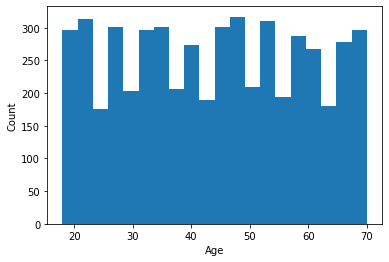

In [6]:
#2. What is the distribution of the 'Age' feature in the dataset?
plt.hist(file['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [7]:
#3. Which feature has the highest correlation with the 'Spending Score (1-100)' feature?
corr_matrix = file.corr()

# Print the correlation coefficients of the 'Spending Score (1-100)' feature
print(corr_matrix['Spending Score (1-100)'])

CustomerID                0.017582
Gender                    0.020395
Age                      -0.019664
Annual Income (k$)        0.008992
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64


'Age' feature has the highest negative correlation with the 'Spending Score (1-100)' feature.

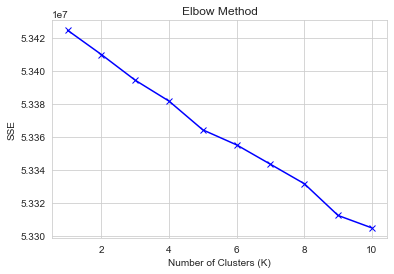

In [8]:
# 4. What is the optimal number of clusters for customer segmentation according to the
# Elbow Method?
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical columns
file_encoded = pd.get_dummies(file, columns=['Address', 'Occupation', 'City'])

# Scale the data
scaler = StandardScaler()
file_scaled = scaler.fit_transform(file_encoded)

# Determine optimal number of clusters using elbow method
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(file_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE against number of clusters
sns.set_style("whitegrid")
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [10]:
# 5. What is the average annual income of customers in the dataset?
print('Average annual income: ${:,.2f}'.format(file['Annual Income (k$)'].mean()))

Average annual income: $105.17


In [11]:
# 6. What is the average spending score of male customers in the dataset?

male_customers = file[file['Gender'] == 1]
male_spending_score = male_customers['Spending Score (1-100)'].mean()
print("Average spending score for male customers:", male_spending_score)


Average spending score for male customers: 50.43823760818253


In [17]:
# 8. What is the percentage of customers in Cluster 1?
# Count the number of customers in each cluster
cluster_counts = file['cluster'].value_counts()

# Calculate the percentage of customers in Cluster 1
percentage_cluster_1 = cluster_counts[1] / len(file) * 100

print("Percentage of customers in Cluster 1: {:.2f}%".format(percentage_cluster_1))

Percentage of customers in Cluster 1: 0.21%


In [18]:
# 9. What is the most frequent age group in Cluster 2?
cluster_2 = file[file['cluster'] == 2]
print(cluster_2['Age'].value_counts().index[0])


70


In [19]:
# 10. What is the average income of customers in Cluster 3?
cluster_3 = file[file['cluster'] == 3]
print('Average income of customers in Cluster 3: ${:,.2f}'.format(cluster_3['Annual Income (k$)'].mean()))

Average income of customers in Cluster 3: $62.96


In [20]:
# 11. Show the count of value in each cluster.
file['cluster'].value_counts()
print(file['cluster'].value_counts())

2    2777
3    2400
4      11
1      11
0       1
Name: cluster, dtype: int64


In [23]:
# 12. Show customers from each cluster.
file.groupby('cluster').mean()
print(file.groupby('cluster').mean())

          CustomerID    Gender        Age  Annual Income (k$)  \
cluster                                                         
0        1975.000000  0.000000  26.000000           28.000000   
1        2714.909091  0.545455  49.545455          119.363636   
2        2700.482895  0.495139  48.983075          141.718401   
3        2485.155000  0.480417  37.679167           62.960417   
4        2468.000000  0.727273  46.909091           82.545455   

         Spending Score (1-100)  
cluster                          
0                     69.000000  
1                     53.090909  
2                     46.704717  
3                     53.439167  
4                     53.090909  


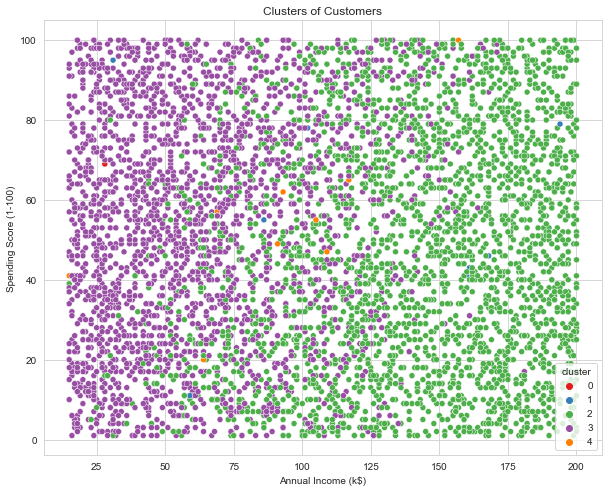

In [24]:
#13. Make a visualization of the clusters.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=file, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [27]:
# 14. Now Take the 3 features (["Age","Annual Income (k$)","Spending Score (1-100)"]) and
# repeat steps from 11 to 13.
file_3 = file[["Age","Annual Income (k$)","Spending Score (1-100)","cluster"]]
file_3.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,2
1,21,15,81,3
2,20,16,6,3
3,23,16,77,3
4,31,17,40,3


In [28]:
# 11. Show the count of value in each cluster.
file_3['cluster'].value_counts()
print(file_3['cluster'].value_counts())

2    2777
3    2400
4      11
1      11
0       1
Name: cluster, dtype: int64


In [29]:
# 12. Show customers from each cluster.
file.groupby('cluster').mean()
print(file.groupby('cluster').mean())

          CustomerID    Gender        Age  Annual Income (k$)  \
cluster                                                         
0        1975.000000  0.000000  26.000000           28.000000   
1        2714.909091  0.545455  49.545455          119.363636   
2        2700.482895  0.495139  48.983075          141.718401   
3        2485.155000  0.480417  37.679167           62.960417   
4        2468.000000  0.727273  46.909091           82.545455   

         Spending Score (1-100)  
cluster                          
0                     69.000000  
1                     53.090909  
2                     46.704717  
3                     53.439167  
4                     53.090909  


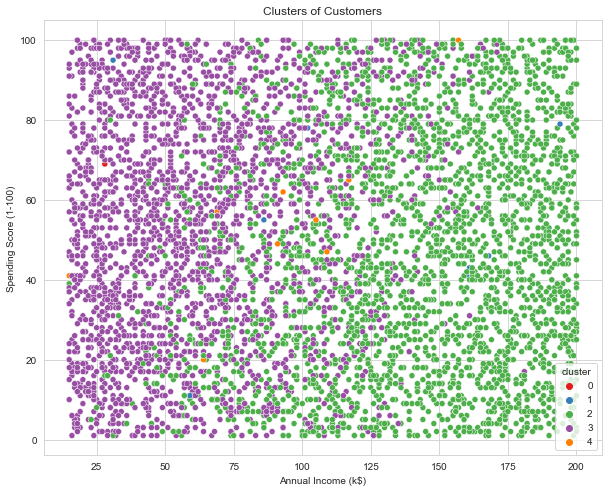

In [30]:
# 13 Make a visualization of the clusters.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=file_3, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()